*   Pedro Queiroz Luis de Assis (pqla@cesar.school)
*   Thiago Fornelos Albuquerque (tfa@cesar.school)
*   Hamilton Celerino da Fonseca Neto (hcfn@cesar.school)

Link para dataset: https://www.kaggle.com/datasets/muratkokludataset/pistachio-dataset

In [ ]:
%matplotlib inline
import os
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

from IPython import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [ ]:
uploaded_file = files.upload()

Saving Pistachio_16_Features_Dataset.xls to Pistachio_16_Features_Dataset (1).xls


## Dataset: Leitura e visualização dos dados

In [ ]:
df = pd.read_excel('Pistachio_16_Features_Dataset.xls')
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,Kirmizi_Pistachio


#EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           2148 non-null   int64  
 1   PERIMETER      2148 non-null   float64
 2   MAJOR_AXIS     2148 non-null   float64
 3   MINOR_AXIS     2148 non-null   float64
 4   ECCENTRICITY   2148 non-null   float64
 5   EQDIASQ        2148 non-null   float64
 6   SOLIDITY       2148 non-null   float64
 7   CONVEX_AREA    2148 non-null   int64  
 8   EXTENT         2148 non-null   float64
 9   ASPECT_RATIO   2148 non-null   float64
 10  ROUNDNESS      2148 non-null   float64
 11  COMPACTNESS    2148 non-null   float64
 12  SHAPEFACTOR_1  2148 non-null   float64
 13  SHAPEFACTOR_2  2148 non-null   float64
 14  SHAPEFACTOR_3  2148 non-null   float64
 15  SHAPEFACTOR_4  2148 non-null   float64
 16  Class          2148 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 28

In [ ]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,79950.655493,1425.971751,446.248968,238.311842,0.840219,317.919173,0.940093,85015.839851,0.716067,1.898154,0.569172,0.713077,0.005701,0.003017,0.510461,0.955239
std,13121.737799,375.565503,32.445304,30.310695,0.048759,26.908600,0.050452,13154.919327,0.052532,0.240100,0.212760,0.044547,0.000817,0.000340,0.063942,0.051840
min,29808.000000,858.363000,320.344500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400
25%,71936.750000,1170.996250,426.508750,217.875825,0.817500,302.642850,0.919850,76467.000000,0.687000,1.736375,0.371250,0.681550,0.005200,0.002800,0.464475,0.944000
50%,79905.500000,1262.785500,448.574750,236.416350,0.849650,318.965300,0.954150,85075.500000,0.726500,1.896250,0.643400,0.710700,0.005600,0.003000,0.505150,0.973100
75%,89030.500000,1607.906250,468.509400,257.760150,0.875200,336.685525,0.976925,93893.500000,0.753600,2.067025,0.744125,0.741650,0.006100,0.003200,0.550075,0.987300
max,124008.000000,2755.049100,541.966100,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,0.933600,0.877900,0.013100,0.005300,0.770600,0.999000


In [ ]:
df_maiorArea = df[df['AREA']==df['AREA'].max()]
df_maiorArea

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
1303,124008,2581.25,535.6422,307.1895,0.8192,397.3561,0.9361,132478,0.6855,1.7437,0.2339,0.7418,0.0043,0.0025,0.5503,0.9596,Siit_Pistachio


In [ ]:
df.isna().sum()

,0
AREA,0
PERIMETER,0
MAJOR_AXIS,0
MINOR_AXIS,0
ECCENTRICITY,0
EQDIASQ,0
SOLIDITY,0
CONVEX_AREA,0
EXTENT,0
ASPECT_RATIO,0


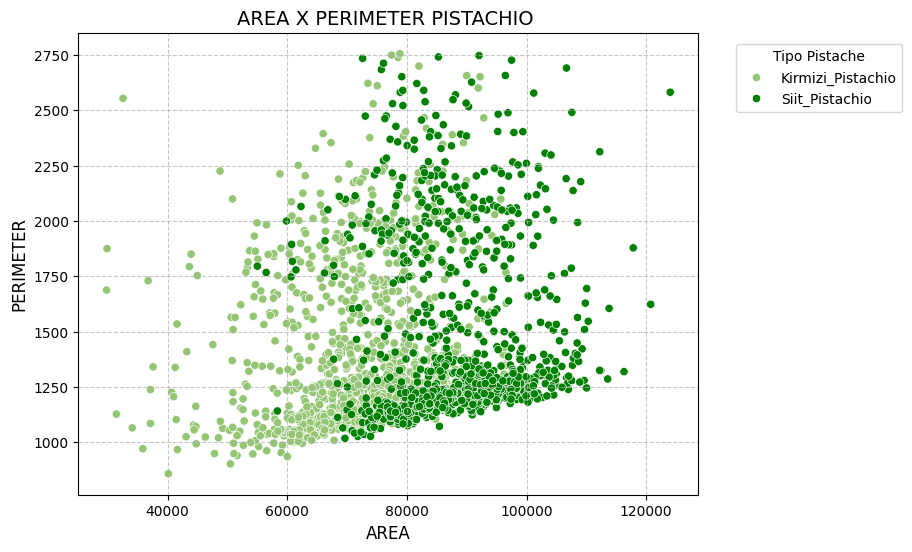

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AREA', y='PERIMETER', hue='Class', data=df,palette=['#93C572', 'green'])

plt.title('AREA X PERIMETER PISTACHIO ', fontsize=14)
plt.xlabel('AREA', fontsize=12)
plt.ylabel('PERIMETER', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(
    title='Tipo Pistache',
    loc='upper left',
    bbox_to_anchor=(1.05, 0.99)
)

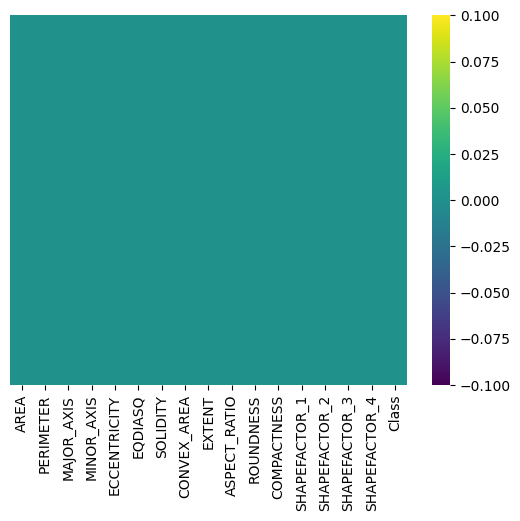

In [ ]:
sns.heatmap(df.isna(),yticklabels=False,cmap="viridis")
plt.show()

In [ ]:
df["Class"].value_counts()

,count
Class,
Kirmizi_Pistachio,1232
Siit_Pistachio,916


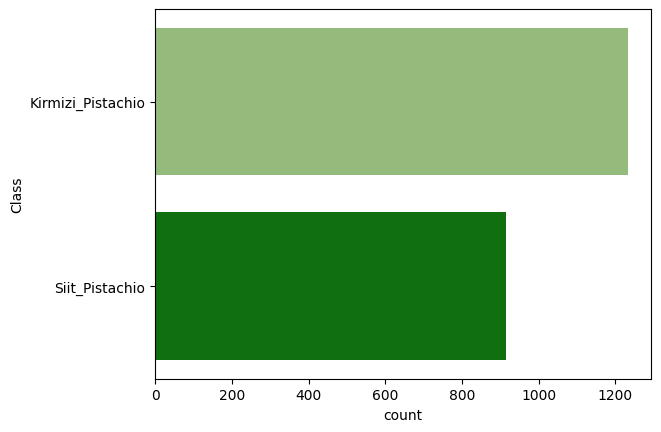

In [ ]:
sns.countplot(data=df,y="Class",palette=['#93C572', 'green'])
plt.show()

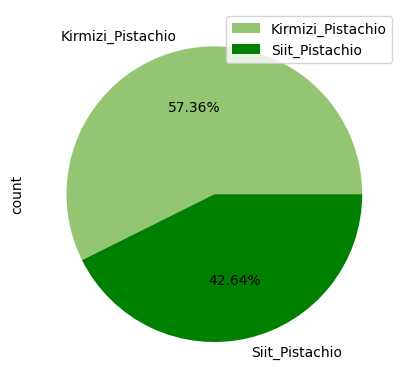

In [ ]:
df["Class"].value_counts().plot(kind="pie",autopct="%.2f%%",colors=['#93C572','g'])
plt.legend(df["Class"].unique())
plt.show()

#Visualização grafica de cada feature

#Normalização

In [ ]:
le = LabelEncoder()
le.fit(df['Class'])
df['Class'] = le.transform(df['Class'])

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(columns=['Class']))
Y = df['Class'].to_numpy()


In [ ]:
Z = pd.DataFrame(X)
Z

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.262296,0.379338,-1.723590,-0.051668,-0.925560,-1.257169,-1.459003,-0.901457,-1.459763,-1.038784,-1.153550,0.330588,0.610410,2.010131,0.300945,-1.579031
1,-0.883675,1.374821,-1.090999,-0.117456,-0.400406,-0.851241,-1.260749,-0.534133,-0.740038,-0.616362,-1.605338,0.112790,0.365630,1.126973,0.080381,-1.019493
2,-0.484931,-0.477881,0.188485,-0.585974,0.674518,-0.439385,-0.453857,-0.363587,-0.064106,0.636739,0.121894,-0.816778,0.488020,-0.050572,-0.822209,-0.311387
3,-0.674203,0.051373,-0.515445,-0.733752,0.493996,-0.632989,0.372861,-0.825955,-0.252605,0.373871,-0.664622,-0.282389,0.365630,-0.050572,-0.309125,0.390931
4,0.010393,-0.464602,0.713037,-0.573444,0.863245,0.052342,0.507673,-0.158673,0.568033,0.942933,0.344732,-0.735946,0.243241,-0.639344,-0.745559,0.541427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,0.459829,-0.716036,-0.058705,0.348171,-0.242450,0.481513,0.836774,0.191620,-0.688629,-0.469306,1.118085,0.707804,-0.613487,-0.344958,0.688887,0.670700
2144,0.437570,2.400604,-0.196363,1.340362,-1.374813,0.460612,-1.020862,0.868559,-1.086572,-1.337896,-1.741204,0.849261,-0.735876,0.832586,0.835930,-1.274179
2145,1.614899,-0.453696,0.893007,1.089574,-0.394252,1.521308,0.965639,1.313135,0.806038,-0.611363,1.113854,0.943565,-1.225435,-0.933730,0.934479,0.838562
2146,1.330800,-0.614568,0.182914,1.196706,-0.937869,1.273221,0.993395,1.015838,0.903143,-1.047116,1.352677,1.475709,-1.347824,-0.639344,1.503878,0.842420


In [ ]:
Xc = X[:,:2]
Xc

array([[-1.26229557,  0.3793384 ],
       [-0.88367525,  1.3748213 ],
       [-0.48493096, -0.47788077],
       ...,
       [ 1.61489872, -0.45369561],
       [ 1.33080009, -0.61456785],
       [-0.11317108,  2.47933587]])

AREA


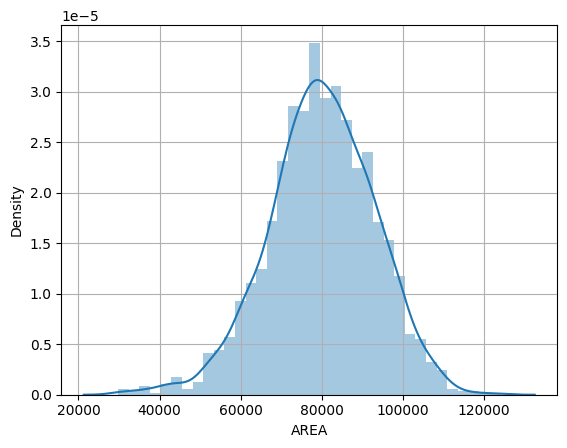

PERIMETER


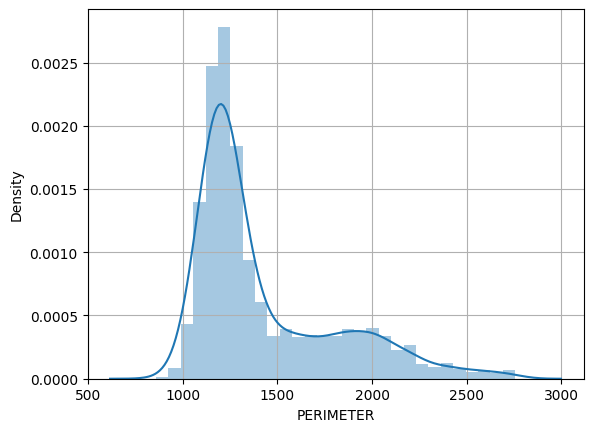

MAJOR_AXIS


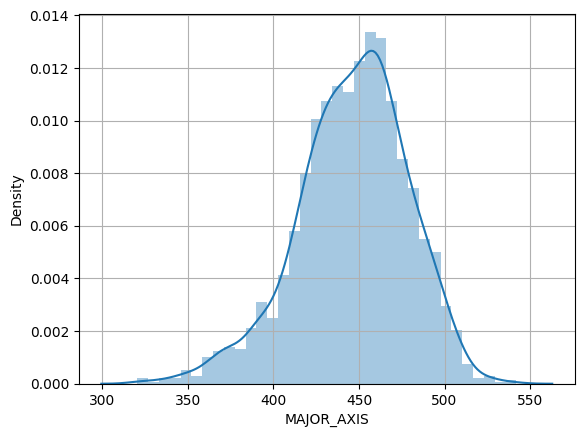

MINOR_AXIS


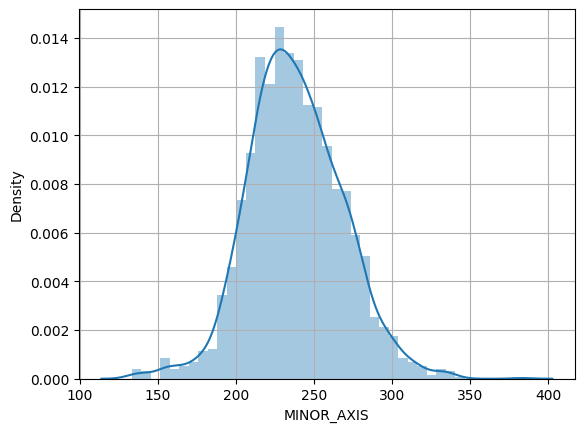

ECCENTRICITY


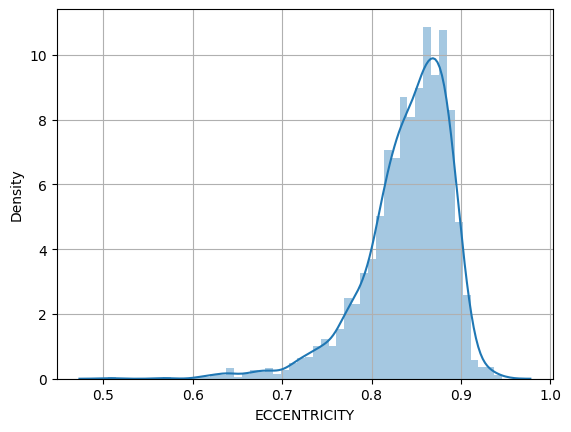

EQDIASQ


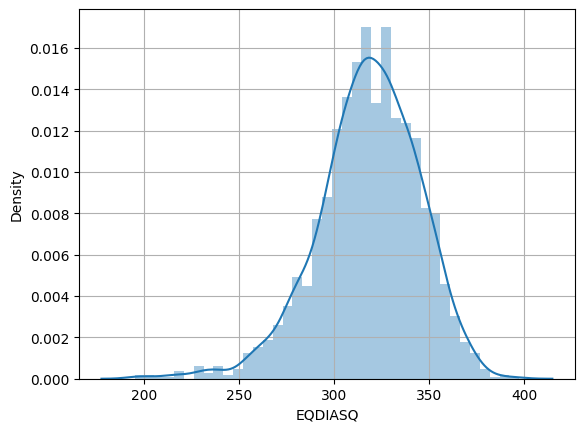

SOLIDITY


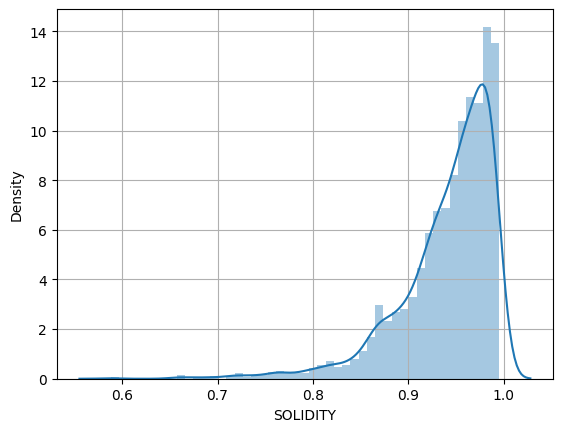

CONVEX_AREA


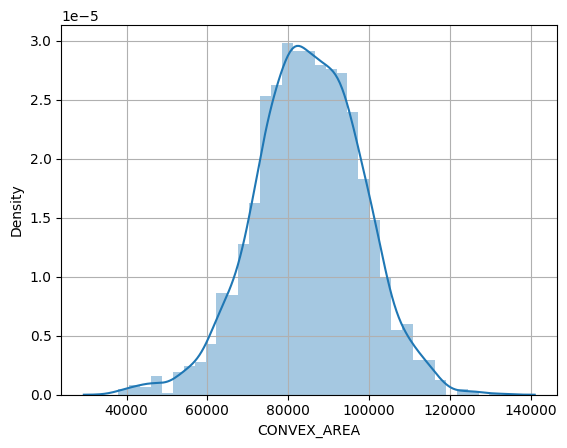

EXTENT


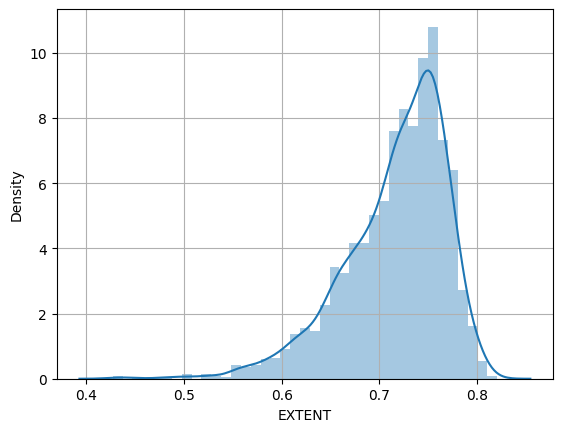

ASPECT_RATIO


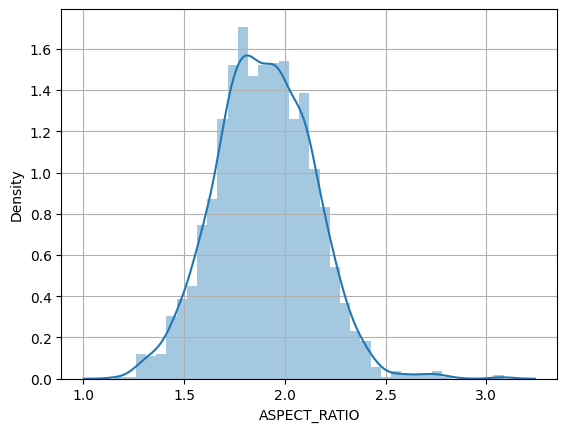

ROUNDNESS


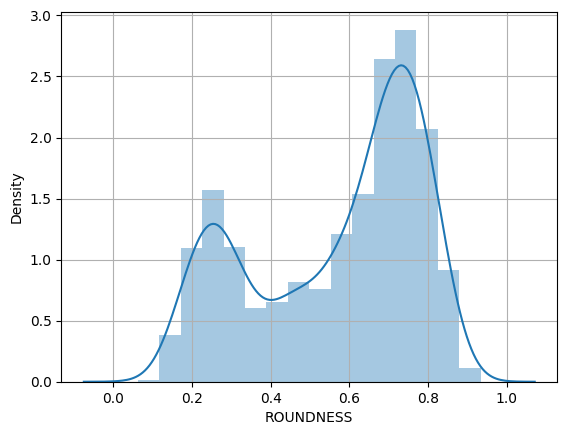

COMPACTNESS


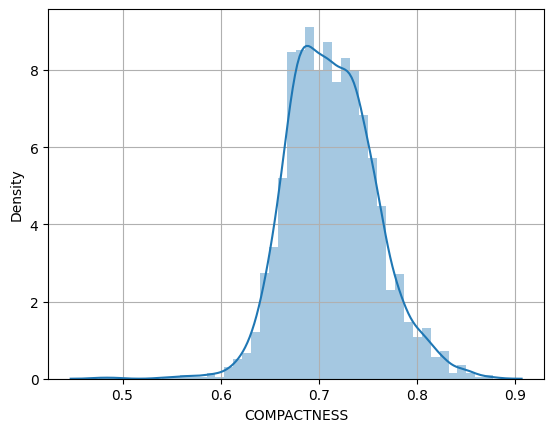

SHAPEFACTOR_1


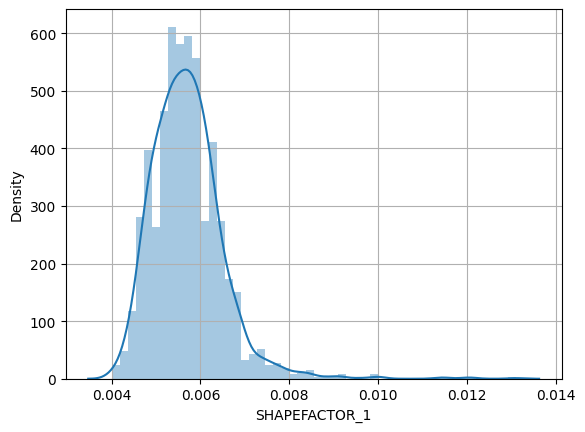

SHAPEFACTOR_2


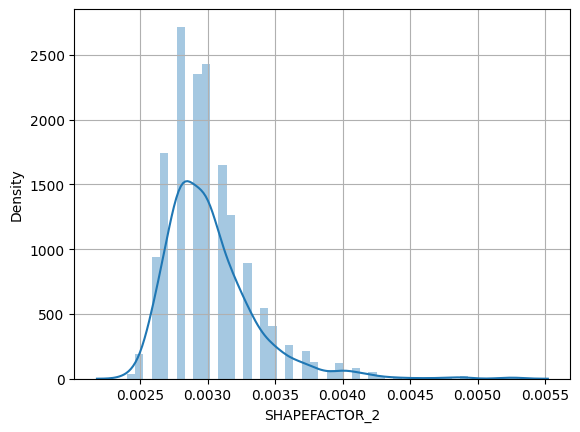

SHAPEFACTOR_3


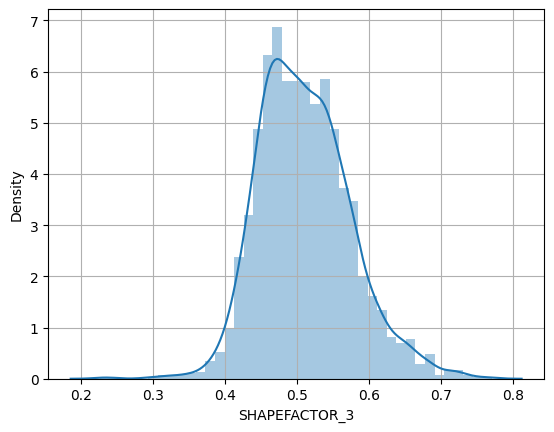

SHAPEFACTOR_4


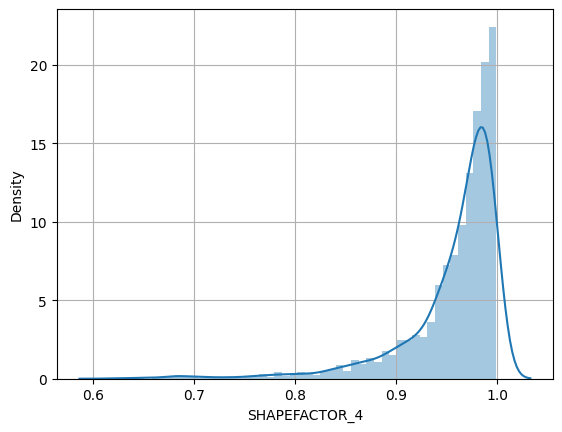

Class


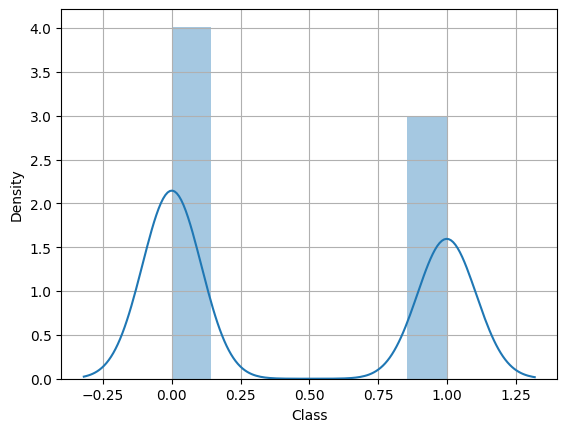

In [ ]:
for col in df:
    print(col)

    plt.figure()
    sns.distplot(df[col])
    plt.grid(True)
    plt.show()

#Prepara os dados para o PyTorch

In [ ]:
X_tensor = torch.FloatTensor(X)  #Entrada é FloatTensor
Y_tensor = torch.LongTensor(Y) # Classe é LongTensor

#Construindo o modelo da rede

In [ ]:

class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.dense = nn.Sequential(
            nn.Linear(16, 5),
            nn.ReLU(),
            nn.Linear(5, 5),
            nn.ReLU(),
            nn.Linear(5,2),
        )

    def forward(self, x):
        x = self.dense(x)

        return x

model = Modelo()
print(model)

Modelo(
  (dense): Sequential(
    (0): Linear(in_features=16, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=2, bias=True)
  )
)


#Predict utilizada para predição de classes e na visualização

In [ ]:
def predict(model, inputs):
    outputs = model((inputs))
    _, predicts = torch.max(outputs, 1)
    return predicts.data.numpy()

#Treinamento

In [ ]:
lr = 0.15

optimizer = torch.optim.SGD(model.parameters(), lr=lr)

criterion = nn.CrossEntropyLoss()

#Laço principal de treinamento

In [ ]:
nb_epoch = 100
losses = []


for i in range(nb_epoch):
    # predict da rede
    output = model((X_tensor))

    loss = criterion(output,(Y_tensor))

    # zero, backpropagation gradient, atualiza param gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.data)


print('Final loss:', loss.data)

Final loss: tensor(0.3127)


#Avaliação do classificador

## Acurácia

In [ ]:
Y_hat = predict(model, X_tensor)
accuracy = (Y_hat == Y).mean()
print()
print('Training Accuracy: ', accuracy)



Training Accuracy:  0.86731843575419


#Matriz de confusão

In [ ]:
pd.crosstab(Y_hat, Y)

col_0,0,1
row_0,,
0,1097,150
1,135,766


## Perda

--- Valores de Loss por Época ---
Época 001: Loss = 0.709726
Época 002: Loss = 0.697060
Época 003: Loss = 0.686284
Época 004: Loss = 0.676927
Época 005: Loss = 0.668516
Época 006: Loss = 0.660735
Época 007: Loss = 0.653341
Época 008: Loss = 0.646132
Época 009: Loss = 0.638919
Época 010: Loss = 0.631598
Época 011: Loss = 0.624088
Época 012: Loss = 0.616238
Época 013: Loss = 0.607978
Época 014: Loss = 0.599300
Época 015: Loss = 0.590148
Época 016: Loss = 0.580519
Época 017: Loss = 0.570437
Época 018: Loss = 0.559907
Época 019: Loss = 0.548939
Época 020: Loss = 0.537574
Época 021: Loss = 0.525880
Época 022: Loss = 0.513973
Época 023: Loss = 0.501921
Época 024: Loss = 0.489829
Época 025: Loss = 0.477761
Época 026: Loss = 0.465845
Época 027: Loss = 0.454161
Época 028: Loss = 0.442813
Época 029: Loss = 0.431876
Época 030: Loss = 0.421421
Época 031: Loss = 0.411536
Época 032: Loss = 0.402268
Época 033: Loss = 0.393648
Época 034: Loss = 0.385706
Época 035: Loss = 0.378430
Época 036: Loss = 0.3

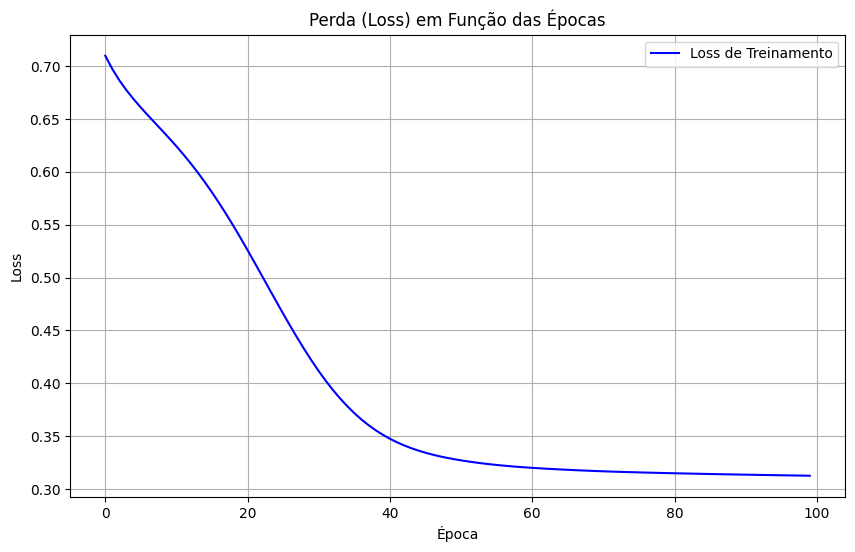

In [ ]:
# Converte a lista de tensores de perda (se for PyTorch) para uma lista de números Python
losses_history = [loss.item() for loss in losses]
print("--- Valores de Loss por Época ---")

for epoca, loss_valor in enumerate(losses_history):
    # Imprime a época (começando em 1) e o valor da perda
    print(f"Época {epoca + 1:03d}: Loss = {loss_valor:.6f}")
print("-----------------------------------")

plt.figure(figsize=(10, 6))

# Plota a perda
# O eixo X será a sequência de épocas (de 0 até nb_epoch - 1)
plt.plot(range(nb_epoch), losses_history, label='Loss de Treinamento', color='blue')

# Adiciona título e rótulos
plt.title('Perda (Loss) em Função das Épocas')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Relátorio de Classificação

In [ ]:
report = classification_report(Y, Y_hat, target_names=['Classe 0', 'Classe 1'])

print("Relatório de Classificação:\n")
print(report)

Relatório de Classificação:

              precision    recall  f1-score   support

    Classe 0       0.88      0.89      0.89      1232
    Classe 1       0.85      0.84      0.84       916

    accuracy                           0.87      2148
   macro avg       0.86      0.86      0.86      2148
weighted avg       0.87      0.87      0.87      2148



#Conclusão

O processo de Análise Exploratória de Dados (EDA), pré-processamento e
treinamento da rede neural para classificar os tipos de pistache (Kirmizi_Pistachio e
Siit_Pistachio) foi realizado com sucesso. O conjunto de dados apresentava 16
features numéricas (como área, perímetro e fatores de forma) e nenhum valor nulo,
o que simplificou a etapa inicial de limpeza. A distribuição das classes está relativamente
balanceada, com 57.31% para Kirmizi_Pistachio (maioria) e 42.69% para
Siit_Pistachio, o que é um bom ponto de partida para o treinamento.



* Pré-processamento: A única coluna não-numérica, "Class", foi
convertida para representação numérica (Label Encoding) e as features
foram normalizadas usando o StandardScaler do sklearn. A normalização
é uma etapa crucial para redes neurais, pois garante que todas as
entradas contribuam de maneira equitativa para o cálculo do gradiente,
evitando que features com grandes escalas dominem o aprendizado.

*  Arquitetura do Modelo: A rede foi construída com três camadas densas
(nn.Linear) e funções de ativação ReLU entre elas, uma arquitetura simples
e comum para problemas de classificação. A camada de saída possui
2 neurônios, o que é apropriado para a classificação binária de dois
tipos de pistache, combinada com a função de perda CrossEntropyLoss.

* Treinamento: O modelo foi treinado por 100 épocas com um otimizador
SGD e uma taxa de aprendizado lr de 0.15. A perda (Loss) convergiu de
forma constante, terminando em aproximadamente 0.3112, indicando
que a rede conseguiu aprender o padrão de classificação a partir dos
dados.

* Overfitting/Underfitting: A acurácia de treinamento atingiu 87.01%, o
que é um resultado sólido para um modelo inicial. Como o treinamento
foi realizado apenas no conjunto completo de dados (sem separação em
treino/teste/validação), a avaliação de overfitting não é definitiva. No
entanto, uma acurácia de 87% sugere que o modelo não está sofrendo
de underfitting (incapacidade de aprender). A matriz de confusão
mostra um bom desempenho, com 1089 acertos para a Classe 0 e 780
acertos para a Classe 1, e uma taxa de erro razoável entre as classes.
A precisão e recall (sensibilidade) para ambas as classes estão em um
bom nível (0.89/0.88 para C0 e 0.85/0.85 para C1).